<a href="https://www.kaggle.com/code/chnngl/sentiment-analysis-on-fiction-books-svm-tf-idf?scriptVersionId=248191130" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import nltk
nltk.data.path.append("/usr/share/nltk_data")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-books-reviews/books_data.csv
/kaggle/input/amazon-books-reviews/Books_rating.csv


In [2]:
import pandas as pd
br = pd.read_csv('/kaggle/input/amazon-books-reviews/Books_rating.csv')
br.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [3]:
bd = pd.read_csv('/kaggle/input/amazon-books-reviews/books_data.csv')
bd.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [4]:
books = pd.merge(br,bd, on = 'Title')
books.shape

(3000000, 19)

In [5]:
df = books[['Title','review/score','review/text','categories']]
df.head()

,Title,review/score,review/text,categories
0,Its Only Art If Its Well Hung!,4.0,This is only for Julie Strain fans. It's a col...,['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,5.0,I don't care much for Dr. Seuss but after read...,['Biography & Autobiography']
2,Dr. Seuss: American Icon,5.0,"If people become the books they read and if ""t...",['Biography & Autobiography']
3,Dr. Seuss: American Icon,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",['Biography & Autobiography']
4,Dr. Seuss: American Icon,4.0,Philip Nel - Dr. Seuss: American IconThis is b...,['Biography & Autobiography']


In [6]:
df.drop_duplicates(inplace = True)
df.shape

/tmp/ipykernel_13/3208856916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


(2617289, 4)

In [7]:
df.dropna(inplace=True)
df.isna().sum()

/tmp/ipykernel_13/3486782518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Title           0
review/score    0
review/text     0
categories      0
dtype: int64

In [8]:
df.shape

(2151435, 4)

In [9]:
df = df[df['categories'].str.contains('Fiction', case=False, na=False)]
df.shape

(920549, 4)

In [10]:
df = df[~df['categories'].str.contains('Nonfiction', case=False, na=False)]
df.shape

(891233, 4)

In [11]:
df['categories'] = df['categories'].str.extract(r'\'(.*)\'')
df.head()

,Title,review/score,review/text,categories
14,Whispers of the Wicked Saints,1.0,I bought this book because I read some glowing...,Fiction
15,Whispers of the Wicked Saints,4.0,"I have to admit, I am not one to write reviews...",Fiction
16,Whispers of the Wicked Saints,1.0,"This is a self-published book, and if you want...",Fiction
17,Whispers of the Wicked Saints,5.0,When I first read this the I was mezmerized at...,Fiction
18,Whispers of the Wicked Saints,5.0,I read the review directly under mine and I ha...,Fiction


In [12]:
df['word_count'] = df['review/text'].apply(lambda x: len(x.split(' ')))
df.head()

,Title,review/score,review/text,categories,word_count
14,Whispers of the Wicked Saints,1.0,I bought this book because I read some glowing...,Fiction,176
15,Whispers of the Wicked Saints,4.0,"I have to admit, I am not one to write reviews...",Fiction,239
16,Whispers of the Wicked Saints,1.0,"This is a self-published book, and if you want...",Fiction,137
17,Whispers of the Wicked Saints,5.0,When I first read this the I was mezmerized at...,Fiction,66
18,Whispers of the Wicked Saints,5.0,I read the review directly under mine and I ha...,Fiction,143


In [13]:
# Negative class: 1 star
neg_df = df[df['review/score'].isin([1, 2])]

# Neutral class: 3 stars
neutral_df = df[df['review/score'] == 3]

# Positive class: 4 or 5 stars
pos_df = df[df['review/score'].isin([4, 5])]

print(len(neg_df), len(neutral_df), len(pos_df))

110659 84808 695766


In [14]:
neg_10k = neg_df.sample(n=10000, random_state=42)
neutral_10k = neutral_df.sample(n=10000, random_state=42)
pos_10k = pos_df.sample(n=10000, random_state=42)

In [15]:
balanced_df = pd.concat([neg_10k, neutral_10k, pos_10k])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle

In [16]:
def map_label(score):
    if score in [1, 2]:
        return 0  # Negative
    elif score == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

balanced_df['label'] = balanced_df['review/score'].apply(map_label)

In [17]:
balanced_df.head()

,Title,review/score,review/text,categories,word_count,label
0,The Good Earth,2.0,The book The Good Earth is about the rise and ...,Juvenile Fiction,262,0
1,Like Water for Chocolate,4.0,"Don't know why this book sticks in my mind, bu...",Fiction,55,2
2,Shadowy Horses,4.0,By far the best of the latest crop of Romantic...,Fiction,247,2
3,"The Hobbitt, or there and back again; illustra...",5.0,"Classic tale, great illustrations. A known qua...",Fiction,23,2
4,Shamanspace,1.0,"For the past year, I had come across Steve Ayl...",Fiction,226,0


In [18]:
balanced_df.to_csv('balanced30k.csv', index=False)

In [19]:
import re
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text_ml(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)                      # Remove HTML tags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)    # Remove URLs
    text = re.sub(r'@\w+|\#', '', text)                    # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)                    # Remove punctuation except underscore
    text = re.sub(r'\d+', '', text)                        # Remove digits/numbers
    text = re.sub(r'\s+', ' ', text).strip()               # Normalize whitespace
     # Lemmatize
    words = text.split()
    text = ' '.join([lemmatizer.lemmatize(word) for word in words])
    return text

In [20]:
balanced_df['cleaned_text_ml'] = balanced_df['review/text'].apply(clean_text_ml)
balanced_df.head()

,Title,review/score,review/text,categories,word_count,label,cleaned_text_ml
0,The Good Earth,2.0,The book The Good Earth is about the rise and ...,Juvenile Fiction,262,0,the book the good earth is about the rise and ...
1,Like Water for Chocolate,4.0,"Don't know why this book sticks in my mind, bu...",Fiction,55,2,dont know why this book stick in my mind but i...
2,Shadowy Horses,4.0,By far the best of the latest crop of Romantic...,Fiction,247,2,by far the best of the latest crop of romantic...
3,"The Hobbitt, or there and back again; illustra...",5.0,"Classic tale, great illustrations. A known qua...",Fiction,23,2,classic tale great illustration a known quanti...
4,Shamanspace,1.0,"For the past year, I had come across Steve Ayl...",Fiction,226,0,for the past year i had come across steve ayle...


In [21]:
balanced_df.to_csv('balanced30k_SVM_cleaned.csv', index=False)

In [22]:
from sklearn.model_selection import train_test_split

X = balanced_df['cleaned_text_ml']
y = balanced_df['label']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# best F1: c-0.7, none, (1,2) 30000
# Define grid manually
param_grid = [
    #{'C': 0.7, 'stop_words': None, 'ngram_range': (1, 2), 'max_features': 15000},
    #{'C': 0.7, 'stop_words': None, 'ngram_range': (1, 2), 'max_features': 20000},
    #{'C': 0.7, 'stop_words': None, 'ngram_range': (1, 2), 'max_features': 25000},
     {'C': 0.1,   'stop_words': None, 'ngram_range': (1, 2), 'max_features': 20000}
]

best_f1 = 0
best_model = None
best_config = None

for params in param_grid:
    print(f"🔍 Testing config: {params}")
    
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(
            max_features=params['max_features'],
            ngram_range=params['ngram_range'],
            stop_words=params['stop_words']
        )),
        ('svm', LinearSVC(C=params['C']))
    ])
    
    pipeline.fit(X_train, y_train)
    y_val_pred = pipeline.predict(X_val)
    
    report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)
    macro_f1 = report['macro avg']['f1-score']
    print(f"Macro F1: {macro_f1:.4f}")
    
    if macro_f1 > best_f1:
        best_f1 = macro_f1
        best_model = pipeline
        best_config = params

print("\n✅ Best config found:")
print(best_config)



🔍 Testing config: {'C': 0.1, 'stop_words': None, 'ngram_range': (1, 2), 'max_features': 20000}
Macro F1: 0.6896

✅ Best config found:
{'C': 0.1, 'stop_words': None, 'ngram_range': (1, 2), 'max_features': 20000}


In [24]:
y_train_pred = best_model.predict(X_train)

# Print classification report
print("📘 Training Performance:")
print(classification_report(y_train, y_train_pred, zero_division=0))

from sklearn.metrics import classification_report, confusion_matrix

# Predict on validation set using the best pipeline
y_val_pred = best_model.predict(X_val)

# Print classification report
print("📊 Validation Performance:")
print(classification_report(y_val, y_val_pred, zero_division=0))

📘 Training Performance:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7000
           1       0.80      0.75      0.78      7000
           2       0.84      0.88      0.86      7000

    accuracy                           0.83     21000
   macro avg       0.83      0.83      0.83     21000
weighted avg       0.83      0.83      0.83     21000

📊 Validation Performance:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1500
           1       0.62      0.57      0.59      1500
           2       0.72      0.76      0.74      1500

    accuracy                           0.69      4500
   macro avg       0.69      0.69      0.69      4500
weighted avg       0.69      0.69      0.69      4500



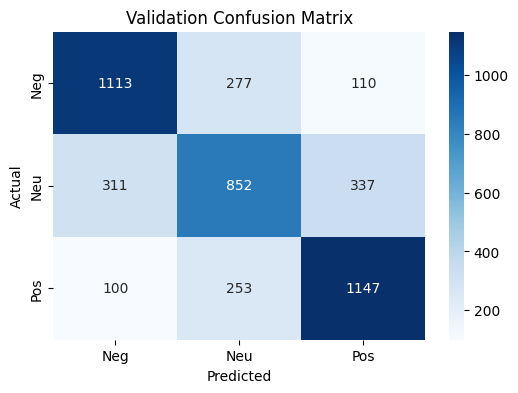

In [25]:
# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Neg", "Neu", "Pos"], yticklabels=["Neg", "Neu", "Pos"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Validation Confusion Matrix")
plt.show()

In [26]:
# Predict on test data
y_test_pred = best_model.predict(X_test)

# Evaluate
print("Test Set Classification Report with TF-IDF features:")
print(classification_report(y_test, y_test_pred))

#print(classification_report(y_test, y_test_pred, zero_division=0))

Test Set Classification Report with TF-IDF features:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1500
           1       0.62      0.58      0.60      1500
           2       0.73      0.78      0.76      1500

    accuracy                           0.69      4500
   macro avg       0.69      0.69      0.69      4500
weighted avg       0.69      0.69      0.69      4500



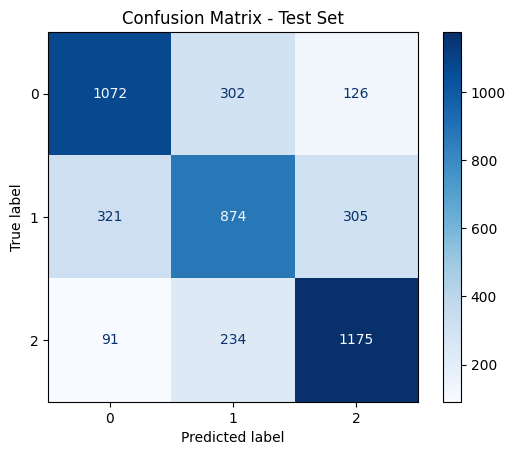

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


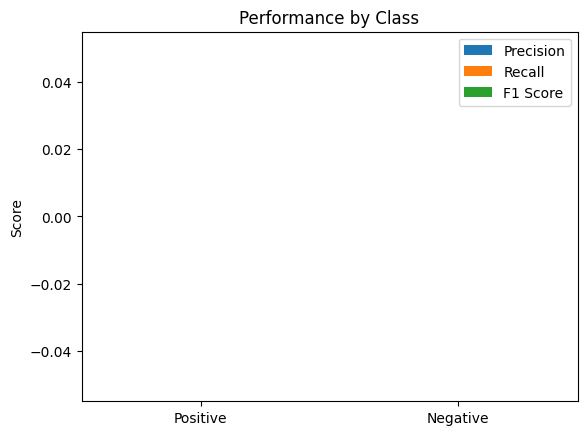

In [28]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average=None, labels=['positive', 'negative'])

labels = ['Positive', 'Negative']
x = range(len(labels))

plt.bar(x, precision, width=0.25, label='Precision')
plt.bar([i+0.25 for i in x], recall, width=0.25, label='Recall')
plt.bar([i+0.5 for i in x], f1, width=0.25, label='F1 Score')

plt.xticks([i + 0.25 for i in x], labels)
plt.ylabel("Score")
plt.title("Performance by Class")
plt.legend()
plt.show()